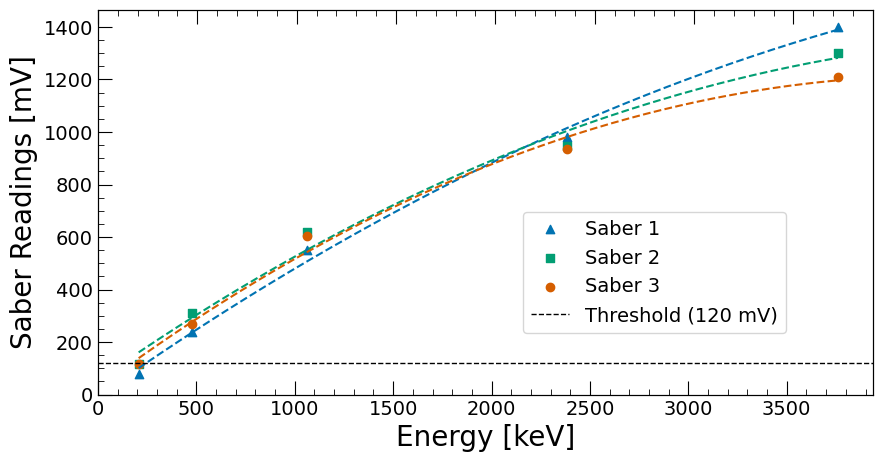

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import seaborn as sns

font = {'size':20}
mpl.rc('font', **font)

palette = sns.color_palette("colorblind")


# Data
data = {
    "Saber 1": [78, 240, 550, 980, 1400],
    "Saber 2": [115, 310, 620, 945, 1300],
    "Saber 3": [116, 270, 604, 935, 1210],
    "Compton [keV]": [207, 478, 1062, 2381, 3760]
}
rows = ["Ba-133", "Cs-137", "Na-22", "Th-232", "Muons"]
df = pd.DataFrame(data, index=rows)

saber_1 = df['Saber 1']
saber_2 = df['Saber 2']
saber_3 = df['Saber 3']
compton = df['Compton [keV]']

# Polynomial approximation (2nd degree)
poly1 = np.polyfit(compton, saber_1, 2)
poly2 = np.polyfit(compton, saber_2, 2)
poly3 = np.polyfit(compton, saber_3, 2)

# Generating values for plotting
compton_range = np.linspace(compton.min(), compton.max(), 500)
fit1 = np.polyval(poly1, compton_range)
fit2 = np.polyval(poly2, compton_range)
fit3 = np.polyval(poly3, compton_range)

# Adjusting the plot to include small perpendicular lines at tick positions

fig = plt.figure(figsize=(10,5))
ax = plt.subplot()

ax.scatter(compton, saber_1, label='Saber 1', color=palette[0], marker='^')
ax.scatter(compton, saber_2, label='Saber 2', color=palette[2], marker='s')
ax.scatter(compton, saber_3, label='Saber 3', color=palette[3])
ax.plot(compton_range, fit1, '--', color=palette[0])
ax.plot(compton_range, fit2, '--', color=palette[2])
ax.plot(compton_range, fit3, '--', color=palette[3])

majorXticks = np.arange(0,4000,500)
minorXticks = np.arange(0,4000,100)
majorYticks = np.arange(0,1600,200)
minorYticks = np.arange(0,1450,50)

ax.set_xticks(majorXticks, minor=False)
ax.set_xticks(minorXticks, minor=True)
ax.set_yticks(majorYticks, minor=False)
ax.set_yticks(minorYticks, minor=True)

ax.tick_params()
ax.tick_params(direction = 'in', length = 10, labelsize=14)
ax.tick_params(which='minor', direction = 'in', length = 4)

axtop = ax.twiny()
axtop.set_xticks(majorXticks, minor=False)
axtop.set_xticks(minorXticks, minor=True)
axtop.tick_params(direction = 'in', length = 10)
axtop.tick_params(which='minor', direction = 'in', length = 4)
axtop.set_xticklabels([])

ax.axhline(y=120, color='black', linestyle='--', linewidth=1, label='Threshold (120 mV)')
ax.set_xlabel('Energy [keV]')
ax.set_ylabel('Saber Readings [mV]')
ax.grid(False)
ax.legend(bbox_to_anchor = (0.9,0.5), fontsize=14)
# ax.legend()

plt.show()



## Error Calculation in Polynomial Regression

When we perform polynomial regression and make predictions based on this model, it's important to quantify the uncertainty associated with these predictions. This process is known as error propagation. Let's break down the steps involved in this error calculation:

### 1. **Residuals Calculation:**
Residuals are the differences between the actual values and the predicted values obtained from the polynomial fit. For each data point in our Compton vs. Saber dataset, we calculate the residual as:

$$ \text{Residual} = \text{Actual Value} - \text{Predicted Value} $$

### 2. **Standard Deviation of Residuals:**
The standard deviation of these residuals gives us a measure of the variability of the predictions from the actual data. It is calculated as:

$$ \sigma_{\text{residuals}} = \sqrt{\frac{1}{N}\sum (\text{Residual})^2} $$

where \(N\) is the number of data points.

### 3. **Error Propagation in a Polynomial:**
Error propagation in a polynomial is essential to estimate the uncertainty in our predictions. For a 2nd degree polynomial \( ax^2 + bx + c \), the uncertainty in the predicted value (\( \Delta y \)) is determined using the error propagation formula for polynomials. This formula considers the uncertainty in each term of the polynomial.

### 4. **Calculating the Uncertainty in the Predicted Value:**
The uncertainty in the predicted value at a specific point (say, at 120 mV) is calculated using the formula:

$$ \Delta y = \sqrt{(2ax\Delta x)^2 + (b\Delta x)^2} $$

Here, \( \Delta x \) is the standard deviation of the residuals, representing the uncertainty in the x-values, \( a \) and \( b \) are the coefficients of the polynomial, and \( x \) is the value at which we are making the prediction.

### 5. **Result Interpretation:**
The final result gives us the uncertainty in our prediction at 120 mV. This range indicates how much the actual value might deviate from the predicted value due to the inherent uncertainty in the polynomial fit.


In [2]:

import numpy as np
from numpy.polynomial.polynomial import Polynomial

def polynomial_fit_and_predict(saber_data, compton_data, value_to_predict):
    # Fit a 2nd degree polynomial
    p = np.polyfit(saber_data, compton_data, 2)
    poly_func = Polynomial(p[::-1])

    # Predict the value
    predicted_value = poly_func(value_to_predict)

    # Calculate residuals and their standard deviation
    predicted_compton = poly_func(saber_data)
    residuals = compton_data - predicted_compton
    std_residuals = np.std(residuals)

    # Calculate uncertainty in the predicted value
    a, b = p[0], p[1]
    uncertainty = np.sqrt((2 * a * value_to_predict * std_residuals) ** 2 + (b * std_residuals) ** 2)

    return poly_func, predicted_value, uncertainty

def main():
    # Original Compton data
    compton_data = np.array([207, 478, 1062, 2381, 3760])

    # Saber data
    saber1_data = np.array([78, 240, 550, 980, 1400])
    saber2_data = np.array([115, 310, 620, 945, 1300])
    saber3_data = np.array([116, 270, 604, 935, 1210])

    # Value to predict
    value_to_predict = 120

    # Analysis for each Saber data set
    for i, saber_data in enumerate([saber1_data, saber2_data, saber3_data], start=1):
        poly_func, predicted_value, uncertainty = polynomial_fit_and_predict(saber_data, compton_data, value_to_predict)
        print(f"Saber {i} Polynomial: {poly_func}")
        print(f"Estimated value at {value_to_predict} mV: {predicted_value:.2f} keV")
        print(f"Uncertainty: ±{uncertainty:.2f} keV")
        print('-' * 50)

if __name__ == "__main__":
    main()


Saber 1 Polynomial: 74.80819438 + 1.44030364·x + 0.00086286·x²
Estimated value at 120 mV: 260.07 keV
Uncertainty: ±63.39 keV
--------------------------------------------------
Saber 2 Polynomial: 72.16430513 + 0.79462003·x + 0.00159678·x²
Estimated value at 120 mV: 190.51 keV
Uncertainty: ±72.17 keV
--------------------------------------------------
Saber 3 Polynomial: 203.60594345 + 0.09967022·x + 0.00235078·x²
Estimated value at 120 mV: 249.42 keV
Uncertainty: ±27.82 keV
--------------------------------------------------
